In [33]:
import requests
import re
import numpy as np
import os
from bs4 import BeautifulSoup
import pandas as pd
from io import BytesIO
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib.pyplot import imshow
from datetime import datetime
import matplotlib.pyplot as plt
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}

## Imagenes controles DataFrame

This dataset has pictures about safety and quality controls taken in Edenor, Buenos Aires Argentina 

The dataset includes images url and their tagged class.

In [6]:
imagenes_controles_df = pd.read_csv('Imagenes controles_etiquetados.csv')
imagenes_controles_df.head()

,uri,tag,Vallado_,ID,Creado,Confirma_etiqueta
0,https://field.voolks.com/api/containers/field-...,NaN,0,5899,23/5/2024,0
1,https://field.voolks.com/api/containers/field-...,NaN,1,5900,23/5/2024,0
2,https://field.voolks.com/api/containers/field-...,NaN,0,5901,23/5/2024,0
3,https://field.voolks.com/api/containers/field-...,NaN,0,5902,23/5/2024,0
4,https://field.voolks.com/api/containers/field-...,NaN,1,5903,23/5/2024,0


## Downloading the image into a tensor

### Image downloading to local disk function

In [ ]:
def save_image(url,folder_path,class_):
    file_path=""
    try:
        
        folder_path = os.path.join(folder_path,class_)
        common_image_value = "608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-"
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        response = requests.get(url)
        if response.status_code==200:

            filename = url.split('/')[-1].replace(common_image_value,"")
            
            # Combina el folder_path con el filename
            file_path = os.path.join( folder_path,filename)

            # Abre un archivo binario para escribir
            with open(file_path, 'wb') as f:
                f.write(response.content)
    except:
        print(f"No se pudo guardar la imagen {url} de clase {class_}")  
    return file_path

## Setting the classes

In [7]:
classes = {
    1 : "Vallado",
    0 : "No vallado"
}

## Importing all the images

In [23]:
path = "dataset_a_validar"
tiempo_inicial = datetime.now()
X_dataset=[]
y_dataset = []
next_start = 11370
for index, url in enumerate(imagenes_controles_df['uri'][next_start:]):
    class_number = imagenes_controles_df['Vallado_'][index+next_start]
    x_train = save_image(url,path,classes[class_number]
                             )
    if (index%10==0 ):
        tiempo_temp = datetime.now()
        print(f"Imagenes cargadas: {index + next_start}" )
        print(f"Tiempo de carga:{tiempo_temp - tiempo_inicial}")
        print(f"Image: {x_train}")
#X_dataset = [download_image(url) for url in imagenes_controles_df['uri']][10000:15000]
#y_dataset = imagenes_controles_df['Vallado_'][10000:15000]
tiempo_final = datetime.now()

tiempo_procesamiento = tiempo_final-tiempo_inicial
print(f"Tiempo de procesamiento: {tiempo_procesamiento}")

Imagenes cargadas: 11370
Tiempo de carga:0:00:02.840940
Image: dataset_a_validar/Vallado/kacb12c6j-1657557180848.jpg
Imagenes cargadas: 11380
Tiempo de carga:0:00:23.598507
Image: dataset_a_validar/No vallado/kacb12c6j-1657293691222.jpg
Imagenes cargadas: 11390
Tiempo de carga:0:00:51.655954
Image: dataset_a_validar/No vallado/jil25a1gj-1657289799854.jpg
Imagenes cargadas: 11400
Tiempo de carga:0:02:16.763567
Image: dataset_a_validar/Vallado/kacb12c6j-1657205096382.jpg
Imagenes cargadas: 11410
Tiempo de carga:0:03:47.575142
Image: dataset_a_validar/Vallado/jil25a1gj-1657201770362.jpg
Imagenes cargadas: 11420
Tiempo de carga:0:04:15.471977
Image: dataset_a_validar/Vallado/jil25a1gj-1657126756648.jpg
Imagenes cargadas: 11430
Tiempo de carga:0:04:44.609492
Image: dataset_a_validar/No vallado/jil25a1gj-1657036677342.jpg
Imagenes cargadas: 11440
Tiempo de carga:0:05:23.852759
Image: dataset_a_validar/Vallado/kacb12c6j-1657028820576.jpg
Imagenes cargadas: 11450
Tiempo de carga:0:06:11.373141

0 - 9450  Tiempo de carga: 9:04:48.749774

9450 - 11310 Tiempo de carga: 5:32:00.648129

11310 - 11370 Tiempo de carga: 0:02:14.090066

11370 - 15440 Tiempo de carga:4:47:44.767645

## Creating the dataset and splitting into Training and Validation Sets

In [9]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 15371 files belonging to 2 classes.
Using 12297 files for training.
Found 15371 files belonging to 2 classes.
Using 3074 files for validation.


## Picking the images and its classes

2024-05-29 16:46:58.005298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


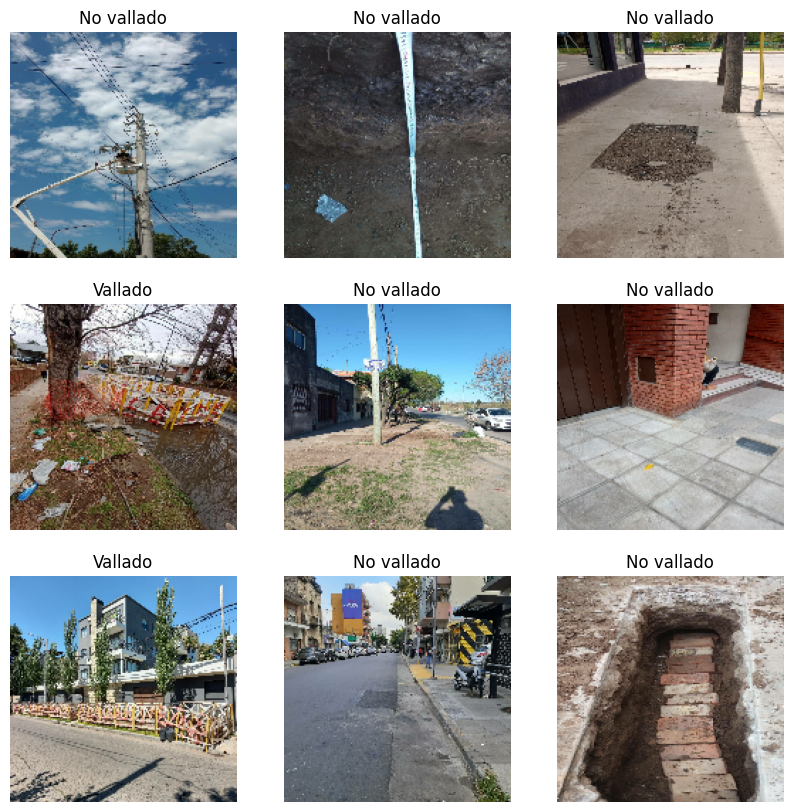

In [11]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Preprocess and Augment Training Data

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [13]:
def data_augmenter():

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.05))
 
    return data_augmentation

## Watching the image and image augmentation

2024-05-29 16:47:28.469399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


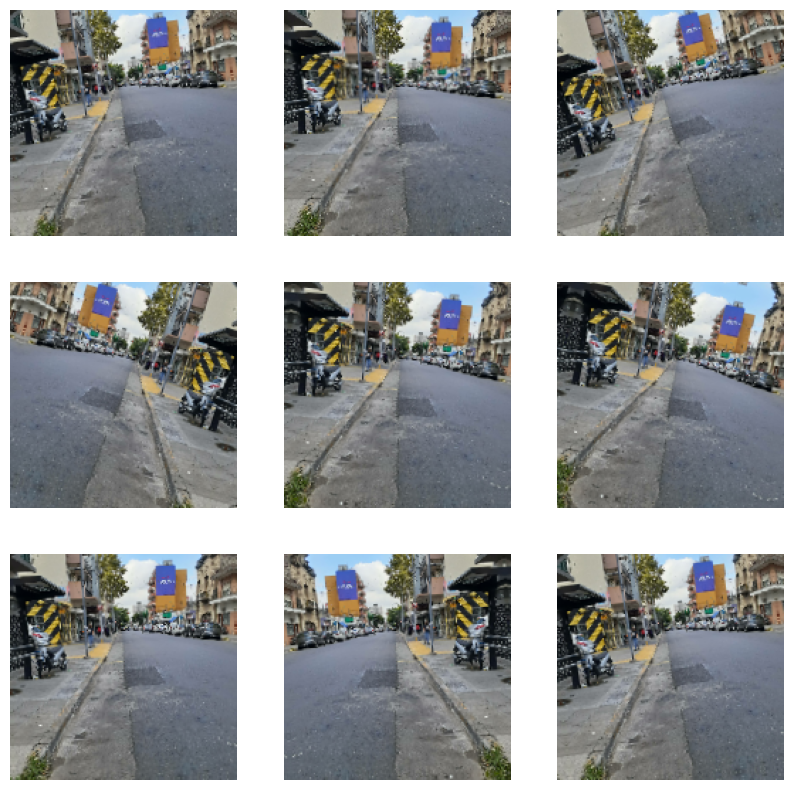

In [15]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

# Using MobileNetV2 for Transfer Learning

In [16]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [17]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [ ]:
base_model.summary()

Let's choose the first batch from the tensorflow dataset to run this images through the MobileNetV2 base model, and test out the predictions made on some of the images

In [19]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [20]:
#Shows the different label probabilities in one tensor 
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)>

Decoding the predictions made by the model

In [21]:
base_model.trainable = False
image_var = tf.Variable(preprocess_input(image_batch))
pred = base_model(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

[[('n03000134', 'chainlink_fence', 0.39196423),
  ('n09421951', 'sandbar', 0.09759758)],
 [('n03930313', 'picket_fence', 0.30308795),
  ('n03127925', 'crate', 0.15255088)],
 [('n03729826', 'matchstick', 0.076623544),
  ('n04208210', 'shovel', 0.04972219)],
 [('n09472597', 'volcano', 0.09770652), ('n04509417', 'unicycle', 0.08228364)],
 [('n04371774', 'swing', 0.14297312),
  ('n03888605', 'parallel_bars', 0.09061067)],
 [('n04366367', 'suspension_bridge', 0.2296984),
  ('n02788148', 'bannister', 0.122556396)],
 [('n09246464', 'cliff', 0.09334916), ('n04208210', 'shovel', 0.04005636)],
 [('n03899768', 'patio', 0.12468427),
  ('n06794110', 'street_sign', 0.079504415)],
 [('n04033995', 'quilt', 0.1840695), ('n03223299', 'doormat', 0.11112086)],
 [('n03042490', 'cliff_dwelling', 0.8503834),
  ('n04523525', 'vault', 0.049323894)],
 [('n03899768', 'patio', 0.11888018),
  ('n03998194', 'prayer_rug', 0.057124965)],
 [('n03000134', 'chainlink_fence', 0.094216585),
  ('n04326547', 'stone_wall', 0

Of course they make no sense, because our class it's not included in the classification model

## Layer Freezing with the Functional API
We are going to use the pretrained model and modify the classifier task.

In [22]:
# UNQ_C2
# GRADED FUNCTION
def vallado_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    base_model.trainable = False 
    inputs = tf.keras.Input(shape=input_shape) 

    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False) 
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
    x = tf.keras.layers.Dropout(rate=0.2)(x)

    outputs = tf.keras.layers.Dense(1,activation='linear')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [24]:
model = vallado_model(IMG_SIZE, data_augmentation)

### Compiling the model

In [25]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
initial_epochs = 5
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 104s 265ms/step - accuracy: 0.8642 - loss: 0.3088 - val_accuracy: 0.9193 - val_loss: 0.1900
Epoch 2/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 111s 287ms/step - accuracy: 0.9268 - loss: 0.1852 - val_accuracy: 0.9157 - val_loss: 0.1968
Epoch 3/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 105s 273ms/step - accuracy: 0.9321 - loss: 0.1793 - val_accuracy: 0.9278 - val_loss: 0.1782
Epoch 4/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 108s 281ms/step - accuracy: 0.9341 - loss: 0.1731 - val_accuracy: 0.9265 - val_loss: 0.1759
Epoch 5/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 109s 283ms/step - accuracy: 0.9340 - loss: 0.1719 - val_accuracy: 0.9284 - val_loss: 0.1766


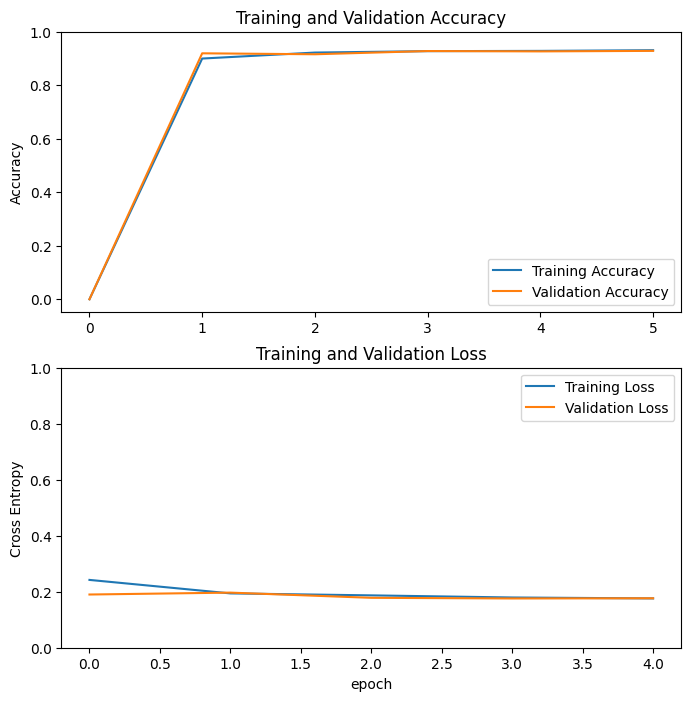

In [27]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
class_names

['No vallado', 'Vallado']

## Fine-tunning the Model
We could try fine-tuning the model by re-running the optimizer in the last layers to improve accuracy.

In [29]:
# UNQ_C3
base_model = model.layers[2]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [30]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 131s 328ms/step - accuracy: 0.9205 - loss: 0.2026 - val_accuracy: 0.9187 - val_loss: 0.2547
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 126s 326ms/step - accuracy: 0.9521 - loss: 0.1290 - val_accuracy: 0.9018 - val_loss: 0.2879
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 128s 333ms/step - accuracy: 0.9603 - loss: 0.1028 - val_accuracy: 0.9340 - val_loss: 0.1861
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 135s 350ms/step - accuracy: 0.9726 - loss: 0.0774 - val_accuracy: 0.8878 - val_loss: 0.3584
Epoch 9/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 130s 338ms/step - accuracy: 0.9779 - loss: 0.0622 - val_accuracy: 0.9314 - val_loss: 0.2225
Epoch 10/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 127s 330ms/step - accuracy: 0.9800 - loss: 0.0507 - val_accuracy: 0.9050 - val_loss: 0.3256


In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

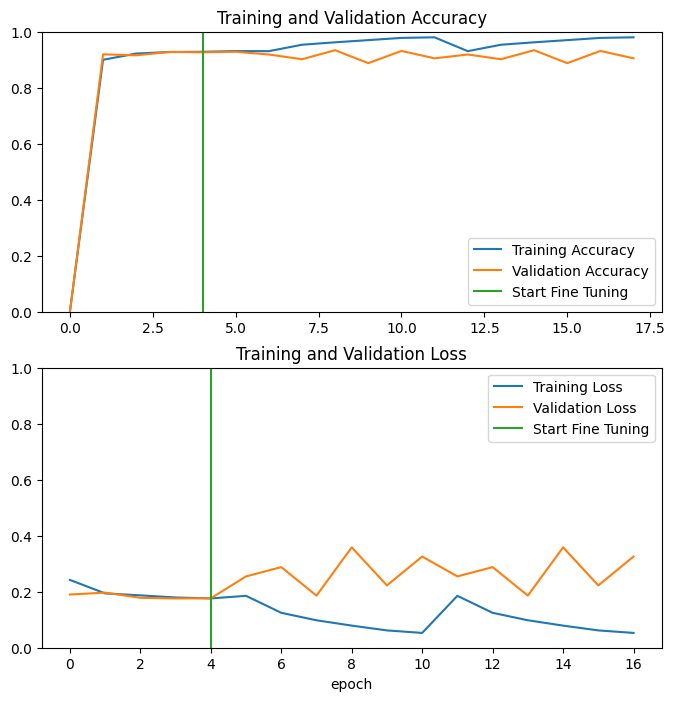

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Foto rowing prueba :1.3773247

In [38]:
img_path ="dataset/Vallado/kacb12c6j-1701371981121.jpg"
#img_path ="dataset/No vallado/ach9xgfbz-1658928112205.jpg"



## Downloading web images

In [79]:
def download_image(url):
    try:
        response = requests.get(url)
        img = load_img(BytesIO(response.content),target_size=(160,160))
        #img_array = img_to_array(img) 
        #resize_image = img_array /255.0
        return img
    except:
        print("No se pudo realizar el request")
        return None

In [80]:
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow


### Prediction function

In [76]:
#url= "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-kacb12c6j-1701355911684.jpg"


def image_prediction(path_image,model,url:bool):
    
    if (url):
        img = download_image(path_image)   
    else:
        img = image.load_img(path_image, target_size=(160, 160))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = x/255.0]
    x2 = x 
    print('Input image shape:', x.shape)
    imshow(img)
    prediction = model.predict(x2)
    print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
    pred_class = (prediction > 1).astype(int)
    class_name = class_names[pred_class[0][0]]
    print(f"Class name: {class_name}")

## Saving the model

In [95]:
print(keras.__version__)

3.3.3


In [96]:
model.save("vallado_classifier.h5")

TypeError: cannot pickle 'module' object

In [92]:
# Guardar la arquitectura del modelo en formato JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos del modelo en formato HDF5
model.save_weights("model_weights.weights.h5")


## Loading the model

In [93]:
from tensorflow.keras.models import load_model
modelito = load_model("vallado_classifier.keras")

ValueError: No model config found in the file at vallado_classifier.h5.

### Making some predictions

Input image shape: (1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[7.8345785]]
Class name: Vallado


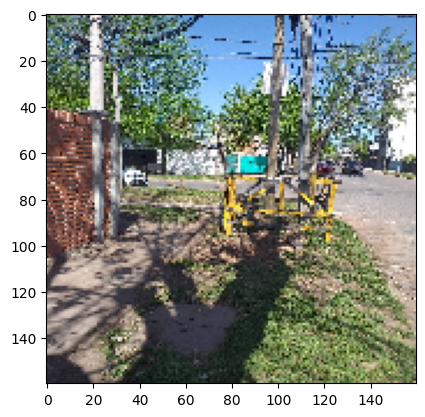

In [85]:
#img_path ="dataset/Vallado/kacb12c6j-1703269902501.jpg"
img_path=  "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1697566683473.jpg"
image_prediction(img_path,modelito,url=True)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()



In [ ]:
from huggingface_hub import upload_file
upload_file("vallado_model.h5","vallado_model.h5",repo_id="vallado_classification")

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="vallado_model.h5",    # Path to the file or a file-like object
    path_in_repo="vallado_model.h5",       # Where the file should be stored in the repo
    repo_id="BrunoJaime/vallado_classification" # The repo ID (username/repo_name                 # Optional, set to "dataset" for dataset repos
)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "modelo_mio",
    evaluation_strategy="steps",
    logging_steps=5,
    num_train_epochs=10,
    push_to_hub=True
)

2024-05-19 01:16:25.959752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 01:16:26.255112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 01:16:27.873174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
trainer = Trainer(
    model = model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    compute_metrics='accuracy'
)

In [ ]:
import tensorflow as tf

# Carga tu modelo original
model = tf.keras.models.load_model('vallado_model.h5')

# Convierte el modelo a cuantificación post-entrenamiento
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Guarda el modelo cuantificado
with open('modelo_cuantificado.tflite', 'wb') as f:
    f.write(tflite_quant_model)